In [23]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.3.0


In [ ]:
#!pip install -U turicreate

In [ ]:
"""
#@title
import turicreate as tc

# Load the data
data =  tc.SFrame.read_csv('https://raw.githubusercontent.com/apple/turicreate/master/src/python/turicreate/test/mushroom.csv')

# Label 'p' is edible
data['label'] = data['label'] == 'p'

# Make a train-test split
train_data, test_data = data.random_split(0.8)

# Create a model.
model = tc.boosted_trees_regression.create(train_data, target='label',
                                           max_iterations=22,
                                           max_depth =  5)

# Save predictions to an SArray
predictions = model.predict(test_data)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(test_data)

data.show()
"""

"\n#@title\nimport turicreate as tc\n\n# Load the data\ndata =  tc.SFrame.read_csv('https://raw.githubusercontent.com/apple/turicreate/master/src/python/turicreate/test/mushroom.csv')\n\n# Label 'p' is edible\ndata['label'] = data['label'] == 'p'\n\n# Make a train-test split\ntrain_data, test_data = data.random_split(0.8)\n\n# Create a model.\nmodel = tc.boosted_trees_regression.create(train_data, target='label',\n                                           max_iterations=22,\n                                           max_depth =  5)\n\n# Save predictions to an SArray\npredictions = model.predict(test_data)\n\n# Evaluate the model and save the results into a dictionary\nresults = model.evaluate(test_data)\n\ndata.show()\n"

In [24]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['hava_csv.csv']))



Saving hava_csv.csv to hava_csv.csv


In [25]:
dataset.tail()

,PM10,SO2,NO,NO2,NOX,O3,ISI,RUZGAR,NEM,BASINC
145,85.71,14.63,3.50,23.75,27.08,51.58,13.1,3.17,37.2,969.63
146,101.46,13.71,2.75,24.58,27.25,44.21,10.0,2.88,52.7,937.00
147,74.25,15.38,5.96,28.96,34.83,33.79,9.1,2.67,55.5,921.29
148,76.50,15.13,4.33,26.46,30.75,36.96,11.5,2.58,36.6,935.67
149,112.96,17.00,5.25,33.79,39.04,29.96,11.4,1.96,41.5,934.71


In [4]:
dataset.isna().sum()

PM10      0
SO2       0
NO        0
NO2       0
NOX       0
O3        0
ISI       0
RUZGAR    0
NEM       0
BASINC    0
dtype: int64

In [ ]:
"""
# PCA 1
data_stats = dataset.describe()
data_stats.pop("PM10")
data_stats = data_stats.transpose()

pca_dataset_label = dataset.pop('PM10')
print("dataset", dataset)
print("labels", pca_dataset_label)

def norm(x):
  return (x - data_stats['mean']) / data_stats['std']
normed_pca_dataset = norm(dataset)

normed_pca_dataset
"""

'\n# PCA 1\ndata_stats = dataset.describe()\ndata_stats.pop("PM10")\ndata_stats = data_stats.transpose()\n\npca_dataset_label = dataset.pop(\'PM10\')\nprint("dataset", dataset)\nprint("labels", pca_dataset_label)\n\ndef norm(x):\n  return (x - data_stats[\'mean\']) / data_stats[\'std\']\nnormed_pca_dataset = norm(dataset)\n\nnormed_pca_dataset\n'

In [ ]:
"""
# PCA 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normed_pca_dataset)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['pc1', 'pc2'])

pca_final = pd.concat([principalDf, pca_dataset_label], axis = 1)
"""

"\n# PCA 2\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(normed_pca_dataset)\nprincipalDf = pd.DataFrame(data = principalComponents,                            columns = ['pc1', 'pc2'])\n\npca_final = pd.concat([principalDf, pca_dataset_label], axis = 1)\n"

In [ ]:
"""
# PCA 3
dataset = pca_final
"""

'\n# PCA 3\ndataset = pca_final\n'

In [26]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset.shape, " ", test_dataset.shape)


(120, 10)   (30, 10)


In [ ]:
#sns.pairplot(train_dataset[["PM10", "ISI", "RUZGAR", "NEM", "BASINC"]], diag_kind="kde")

In [27]:
train_stats = train_dataset.describe()
#train_stats.pop("PM10")
train_stats = train_stats.transpose()
train_stats #["mean"]
#print(train_stats["mean"].shape)

,count,mean,std,min,25%,50%,75%,max
PM10,120.0,180.204250,92.358937,43.71,112.1050,154.525,250.7625,468.96
SO2,120.0,33.028667,43.001415,2.38,11.6775,18.460,29.8225,167.54
NO,120.0,16.532167,15.307382,1.71,5.9500,10.210,22.9000,73.13
NO2,120.0,41.808667,14.616318,6.04,30.7850,39.500,50.4500,83.96
NOX,120.0,58.535000,19.662024,22.25,44.3475,57.880,69.9875,123.00
O3,120.0,32.316167,14.581395,2.00,21.4425,32.830,42.8000,67.42
ISI,120.0,0.159167,7.276259,-11.80,-6.8250,0.400,6.7500,11.90
RUZGAR,120.0,1.701250,0.706337,0.92,1.2400,1.440,1.9600,5.04
NEM,120.0,61.831583,25.096034,14.54,47.2500,71.600,79.7500,98.50
BASINC,120.0,952.852000,24.243316,889.08,936.3550,952.710,968.6775,1004.63


In [8]:
train_labels = train_dataset.pop('PM10')
test_labels = test_dataset.pop('PM10')

In [3]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

y = np.linspace(1, len(normed_train_data["SO2"]), 120)
print(y)
print(normed_train_data.describe())
print(len(normed_train_data["SO2"]))
plt.scatter(y, normed_train_data["NEM"])


'\nnormed_train_data = norm(train_dataset)\nnormed_test_data = norm(test_dataset)\n\ny = np.linspace(1, len(normed_train_data["SO2"]), 120)\nprint(y)\nprint(normed_train_data.describe())\nprint(len(normed_train_data["SO2"]))\nplt.scatter(y, normed_train_data["NEM"])\n'

In [21]:
"""
egi = np.array((2,3,4,5))
tes = np.array((3,5,8,4))
topl = np.array((2,3,3,4,4,5,5,8))
topl
import math

mean1 = np.mean(egi)
std1 = np.std(egi)

def nor(x):
  return (x - mean1) / std1
egi_nor = nor(egi)
tes_nor = nor(tes)

print(egi_nor)
print(tes_nor)

mean2 = np.mean(topl)
std2 = np.std(topl)

def nor2(x):
  return (x - mean2) / std2

top_nor = nor2(topl)

print(top_nor)
"""


[-1.34164079 -0.4472136   0.4472136   1.34164079]
[-0.4472136   1.34164079  4.02492236  0.4472136 ]
[-1.31278492 -0.72932496 -0.72932496 -0.14586499 -0.14586499  0.43759497
  0.43759497  2.18797487]


In [30]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [38]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[rmse])
  return model

In [39]:
model = build_model()

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [36]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result
#normed_train_data

array([[ 0.01076251],
       [ 0.01871742],
       [-0.07797258],
       [ 0.01404462],
       [ 0.33424515],
       [-0.02267301],
       [ 0.08681382],
       [-0.41391033],
       [-0.15208359],
       [-0.16721165]], dtype=float32)

In [41]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,rmse,val_loss,val_rmse,epoch
1995,523.562439,16.065554,1978.598999,35.282913,1995
1996,516.476257,15.736111,1956.309082,35.091564,1996
1997,517.485168,15.801674,1955.627319,35.113518,1997
1998,523.445618,15.899348,1950.962524,35.036789,1998
1999,514.882141,15.817540,1969.774048,35.204350,1999


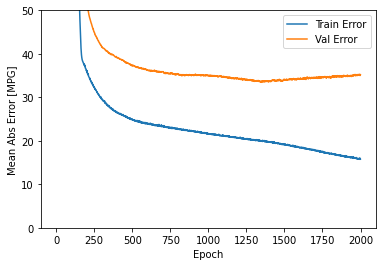

In [44]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['rmse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_rmse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
"""
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

"""
plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................................

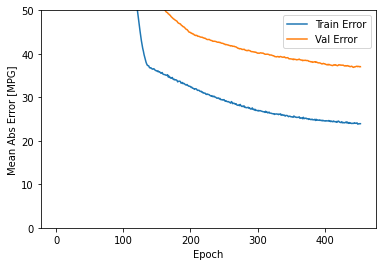

In [45]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [50]:
loss, rmse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} PM10".format(rmse))

1/1 - 0s - loss: 1404.0243 - rmse: 27.8994
Testing set Mean Abs Error: 27.90 PM10


Correlation:  [[1.         0.94597499]
 [0.94597499 1.        ]]
R square (R^2): 0.881677


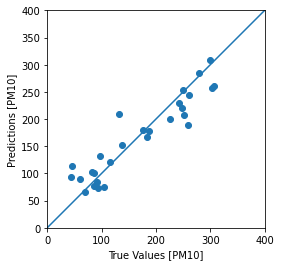

In [53]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PM10]')
plt.ylabel('Predictions [PM10]')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

import numpy as np
from sklearn.metrics import r2_score
print("Correlation: ", np.corrcoef(test_labels, test_predictions))

print("R square (R^2): %f" % sklearn.metrics.r2_score(test_labels, test_predictions))

#normed_test_data.tail()

<Figure size 30000x24000 with 0 Axes>

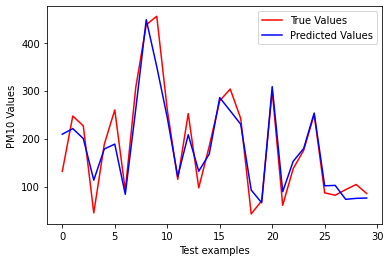

<Figure size 30000x24000 with 0 Axes>

In [49]:
plt.plot(test_labels.values, "r")
plt.plot(test_predictions,"b")
plt.xlabel('Test examples')
plt.ylabel('PM10 Values')
plt.legend(["True Values","Predicted Values"])
plt.figure(figsize=(100,80), dpi=300)


In [ ]:
test_labels.values

array([131.54, 247.13, 226.67,  45.08, 188.  , 259.83,  91.79, 306.58,
       437.33, 455.13, 260.92, 115.  , 252.13,  97.33, 184.  , 278.79,
       303.42, 241.96,  43.  ,  70.38, 299.71,  61.  , 137.33, 175.75,
       250.46,  86.92,  81.92,  93.63, 104.33,  85.71])

In [ ]:
test_predictions.shape

array([207.09206 , 221.72774 , 199.26799 , 117.6965  , 181.52486 ,
       191.68317 ,  88.88197 , 262.0292  , 448.1017  , 348.01547 ,
       245.20631 , 133.59688 , 203.06514 , 130.94617 , 165.99065 ,
       278.3673  , 253.95763 , 225.81541 , 101.99556 ,  75.20355 ,
       309.3977  ,  91.062744, 146.00789 , 177.68687 , 260.7016  ,
       105.58183 , 100.3237  ,  71.46647 ,  74.063034,  77.324524],
      dtype=float32)

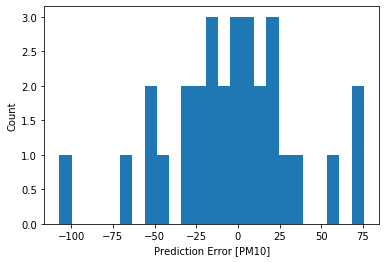

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [PM10]")
_ = plt.ylabel("Count")